# DECORATORS : CONCEPT  and IMPLEMENTATION

##   In Python, functions are first-class objects. 
## This means that functions can be passed around and used as arguments, 
## just like any other object (string, int, float, list, and so on).

###  The funtion is an object while function names are just names as in case of normal variables

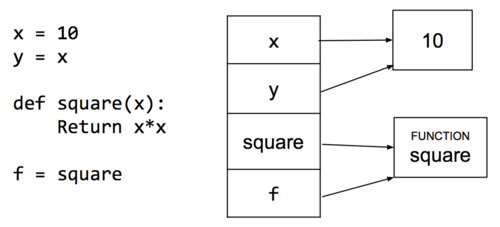

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

###### Create a function

In [2]:
## Create a function for the division operation; where our requirement is that a>b , 
## but suppose we forgot to mention any condition regarding that.

def div(a,b):
    d=a/b
    print(d)
    #return(d)

In [3]:
## Function Call

div(4,2)

2.0


In [4]:
# function call for a<b

div(1,2)

0.5


##### Function can be passed as an object in python

In [5]:
## function can be passed as an object in python

## In Python, functions are first-class objects. 
## This means that functions can be passed around and used as arguments, 
##just like any other object (string, int, float, list, and so on).

def function1(fun, c,d):
    g= fun(c,d)
    return g
    

In [6]:
function1(div,5,4)

1.25


##### Returning function from function

In [7]:
## In Python, functions are first-class objects. 
## This means that functions can be passed around and used as arguments, 
##just like any other object (string, int, float, list, and so on). 

def function2():
    def function3(e,f):
        j=e*f
        return j
    return  function3

In [8]:
w= function2()      ## Call function function2

In [9]:
w                   ## Returned function3 named as w

<function __main__.function2.<locals>.function3(e, f)>

In [10]:
w(3,4)               ## call function3

12

## Decorators

#### Question is how to change the function without affecting the original div() function.

##### Note that here we need two functions nested one within another outer and inner. 

In [11]:
## Here we want that the numerator should be greater than denominator. But the function div doesnt have this check.
## Thus we will use the decorator to do that in original function withouth touching the original div function.

def outer(func):
    def inner(a,b):
        if a<b:
            a,b=b,a
        return func(a,b)
    return inner

In [12]:
div = outer(div)      

In [13]:
div(2,4)

2.0


#### Using decorators we can entirely change the original function without even touching the original function.

In [14]:
## Define a function
def multiply_nums(n,m):
    return n*m

In [15]:
## call the function

multiply_nums(3,4)

12

In [16]:
## Create a wrapper function

def parent(funct):
    def child(x,y):
        return x+y
    return child

In [17]:
## Call the Parent function , whuch returns the child function and saved 
multiply_nums = parent(multiply_nums)

In [18]:
multiply_nums(3,4)

7

#### can we do the decoration with only a single/ outer/ parent function??

#### Answer is No. read below for the answer. and see the code below.

In [19]:
## Note , we cannot do the wrapping with only one outer / parent function.
## it is bcause outer function needs to return an inner function, 
## and the inner function should be exactly similar in terms of arguments to the original function (multiply_nums(a,b)), 
## along with the modifications required. 
## At last we are just replacing the original function with the modified function by just referencing it with the same name as 
## that of original function.

def sumsum(d,f):
    return d+f 
    

In [20]:
multiply_nums=sumsum(3,4)

In [21]:
multiply_nums

7

## See the design and style and examples of doing the decorator.

In [22]:
## decorator function definition
def trace(f):
    def g(x): 
        print(f.__name__, x)
        return f(x)
    return g

In [23]:
@trace                        
def square(x):
    return(x*x)

In [24]:
square(2)

square 2


4

In [25]:
square(3)


square 3


9

In [26]:
square(4)

square 4


16

In [27]:
@trace
def cube(x):
    return x**3

In [28]:
cube(4)

cube 4


64

In [29]:
cube(2)

cube 2


8

#### Lets improve our trace decorator to work with functions taking any number of arguments.

In [33]:
def trace(f):
    def g(*args):
        print(f.__name__, args)
        return f(*args)
    return g

In [34]:
@trace
def square(x):
    return x*x

In [35]:
@trace
def sum_of_squares(x, y):
    return square(x) + square(y)

In [36]:
sum_of_squares (3, 4)

sum_of_squares (3, 4)
square (3,)
square (4,)


25

##### One more Example to end the article

In [30]:
## One more example

def lulu(fu):
    def fulu(e,r,t):
        return e+r+t
    return fulu

In [31]:
@lulu
def kayo(w,d,y):
    return w*d*y

In [32]:
kayo(3,5,7)

15